# Exploratory Data Analysis of Insurance Cross Sell Dataset

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1. Problem Statement

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

### 2. Data Collection

- Dataset Source - https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction
- The data consists of 12 columns and 381109 rows.


### 2.1 Import Data and Required Packages

#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset/train.csv', index_col='id')

#### Show Top 5 Records

In [3]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


#### Shape of the Dataset

In [4]:
df.shape

(381109, 11)

### 2.2 Dataset information

- id: Unique ID for the customer
- Gender: Gender of the customer
- Age: Age of the customer
- Driving_License: 0 : Customer does not have DL, 1 : Customer already has DL
- Region_Code: Unique code for the region of the customer
- Previously_Insured: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
- Vehicle_Age: Age of the Vehicle
- Vehicle_Damage: 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.
- Annual_Premium: The amount customer needs to pay as premium in the year
- Policy_Sales_Channel: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
- Vintage: Number of Days, Customer has been associated with the company
- Response: 1 : Customer is interested, 0 : Customer is not interested

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [5]:
df.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

269

#### There are no duplicate rows in the data set

### 3.3 Check Data type

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 34.9+ MB


### 3.4 Check the number of unique values in each column

In [8]:
df.nunique()

Gender                      2
Age                        66
Driving_License             2
Region_Code                53
Previously_Insured          2
Vehicle_Age                 3
Vehicle_Damage              2
Annual_Premium          48838
Policy_Sales_Channel      155
Vintage                   290
Response                    2
dtype: int64

### 3.5 Check statistics of data set

In [9]:
df.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


#### Insights:

- Age: The dataset is skewed towards middle-aged individuals.
- Driving License: Almost all individuals have a driving license.
- Region Code: There is a moderate spread in region codes, with most falling between 15 and 35.
- Previously Insured: Nearly half of the individuals were not previously insured, indicating a potential market for new insurance policies.
- Annual Premium: There is a wide range of premiums, suggesting different levels of coverage or risk profiles.
- Policy Sales Channel: There is a wide distribution of sales channels, with some channels being more prominent.
- Vintage: Policies have varying ages, with a concentration around the 5-month mark.
- Response: The response rate is low, suggesting potential challenges in engaging the target audience.

### 3.6 Exploring Data

In [10]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [11]:
print("Categories in 'Gender' variable:     ",end=" " )
print(df['Gender'].unique())

print("Categories in 'Vehicle_Age' variable:     ",end=" " )
print(df['Vehicle_Age'].unique())

print("Categories in 'Vehicle_Damage' variable:",end=" " )
print(df['Vehicle_Damage'].unique())

Categories in 'Gender' variable:      ['Male' 'Female']
Categories in 'Vehicle_Age' variable:      ['> 2 Years' '1-2 Year' '< 1 Year']
Categories in 'Vehicle_Damage' variable: ['Yes' 'No']


In [12]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 8 numerical features : ['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']

We have 3 categorical features : ['Gender', 'Vehicle_Age', 'Vehicle_Damage']


### 4. Exploring Data

#### 4.1 Univariate Analysis

In [13]:
def add_percentages(ax):
    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        percentage = '{:.1f}%'.format(100 * height / total)
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', xytext=(0, 9), textcoords='offset points')

#### 4.1.1 Gender Distribution

Text(0.5, 1.0, 'Gender Distribution')

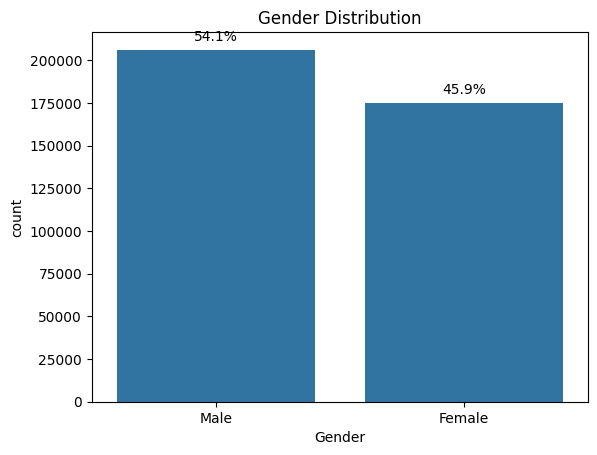

In [14]:
ax = sns.countplot(x='Gender', data=df)
add_percentages(ax)
plt.title('Gender Distribution')

#### 4.1.2 Age Distribution

Text(0.5, 1.0, 'Age Distribution')

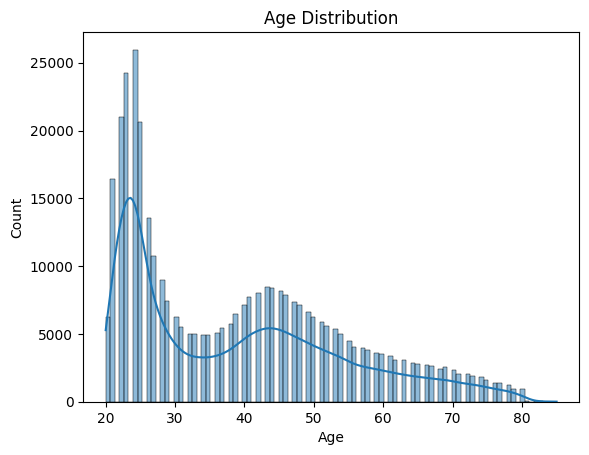

In [15]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')

#### 4.1.3 Driving License

Text(0.5, 1.0, 'Driving License Distribution')

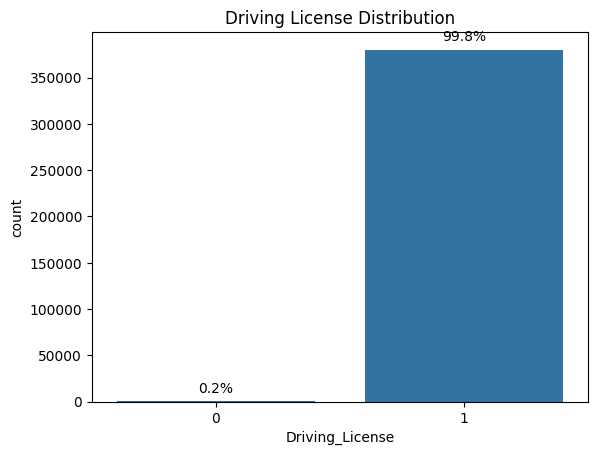

In [16]:
ax = sns.countplot(x='Driving_License', data=df)
add_percentages(ax)
plt.title('Driving License Distribution')

#### 4.1.4 Previously Insured

Text(0.5, 1.0, 'Previously Insured Distribution')

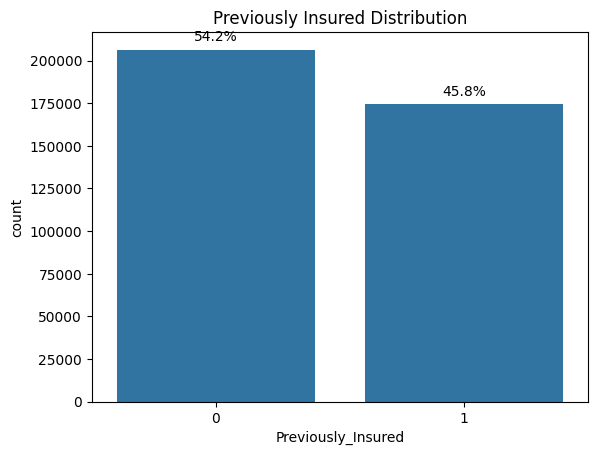

In [17]:
ax = sns.countplot(x='Previously_Insured', data=df)
add_percentages(ax)
plt.title('Previously Insured Distribution')

#### 4.1.5 Vehicle Age Distribution

Text(0.5, 1.0, 'Vehicle Age Distribution')

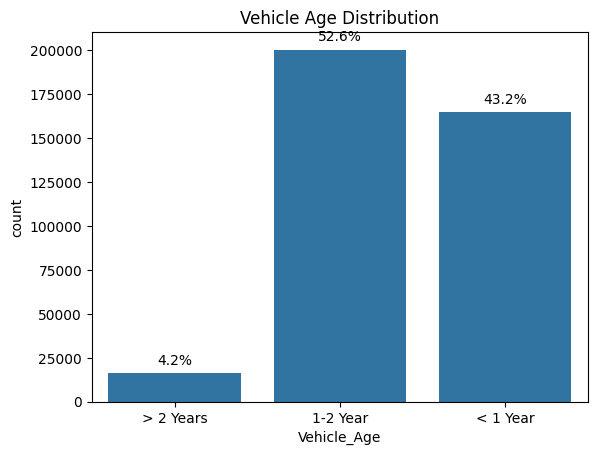

In [18]:
ax = sns.countplot(x='Vehicle_Age', data=df)
add_percentages(ax)
plt.title('Vehicle Age Distribution')

#### 4.1.6 Vehicle Damage Distribution

Text(0.5, 1.0, 'Vehicle Damage Distribution')

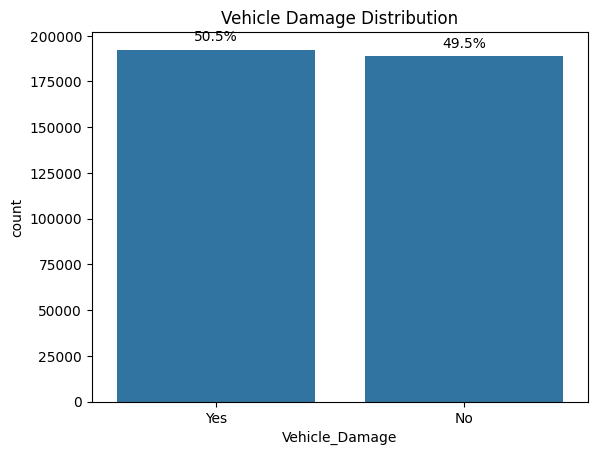

In [19]:
ax = sns.countplot(x='Vehicle_Damage', data=df)
add_percentages(ax)
plt.title('Vehicle Damage Distribution')

#### 4.1.7 Annual Premium Distribution

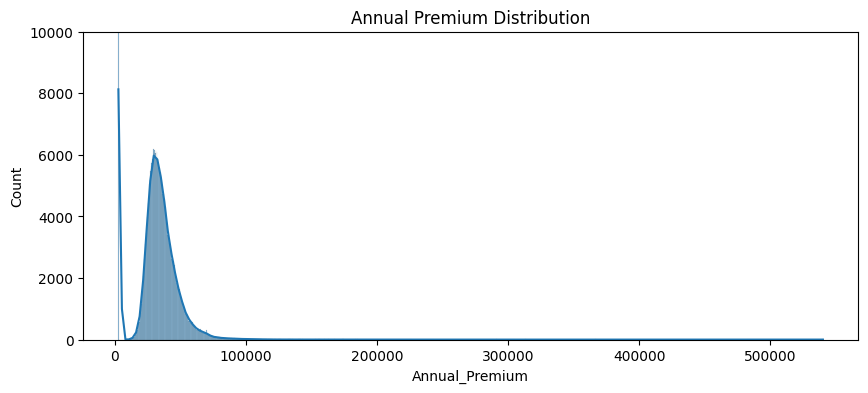

In [20]:
plt.figure(figsize=(10, 4))
ax = sns.histplot(df['Annual_Premium'], kde=True)
plt.title('Annual Premium Distribution')
plt.ylim(0, 10000)  

plt.show()

#### 4.1.8 Vintage Distribution

Text(0.5, 1.0, 'Vintage Distribution')

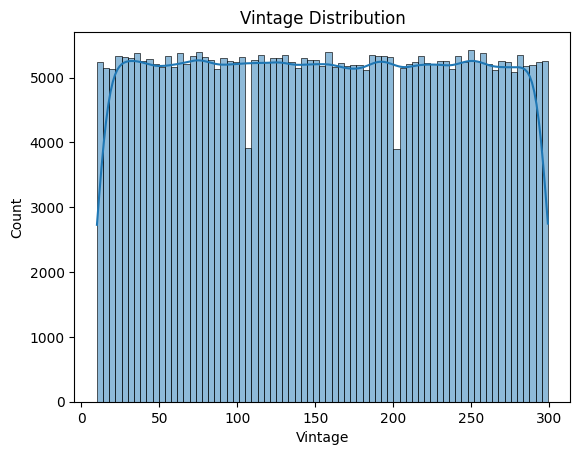

In [21]:
sns.histplot(df['Vintage'], kde=True)
plt.title('Vintage Distribution')

#### 4.2 Bivariate Analysis

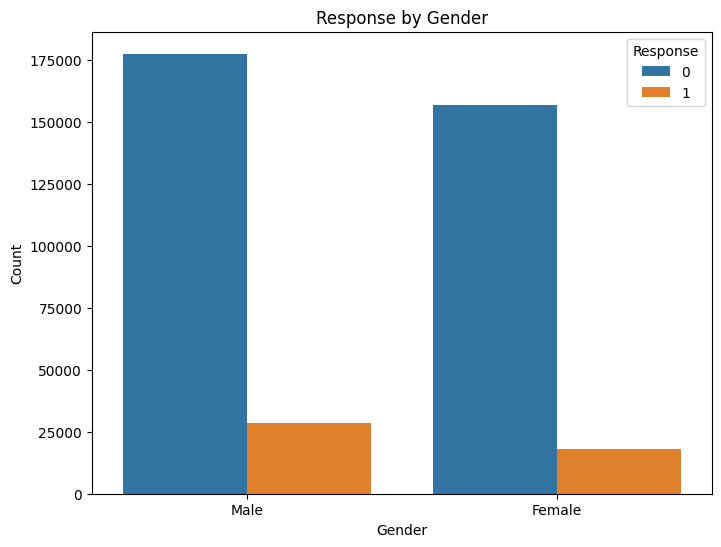

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='Response')
plt.title('Response by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Response', loc='upper right')
plt.show()

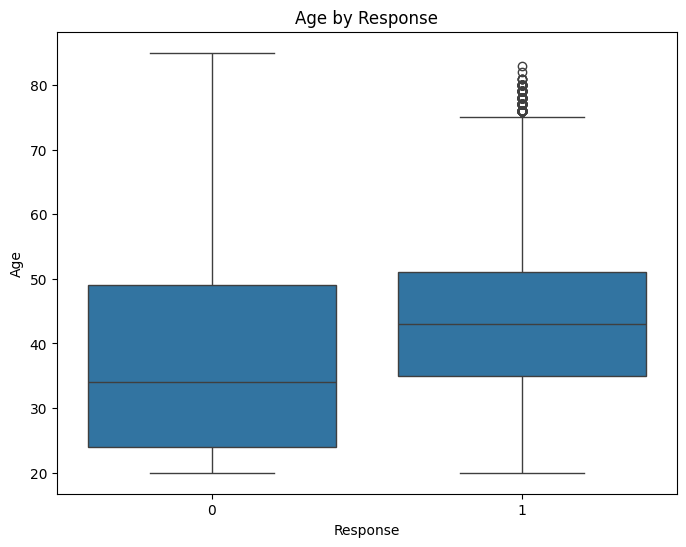

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Response', y='Age')
plt.title('Age by Response')
plt.xlabel('Response')
plt.ylabel('Age')
plt.show()

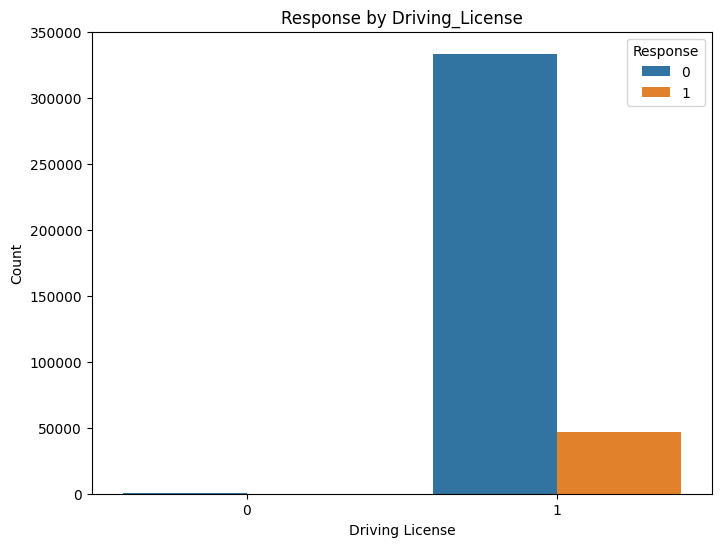

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Driving_License', hue='Response')
plt.title('Response by Driving_License')
plt.xlabel('Driving License')
plt.ylabel('Count')
plt.legend(title='Response', loc='upper right')
plt.show()

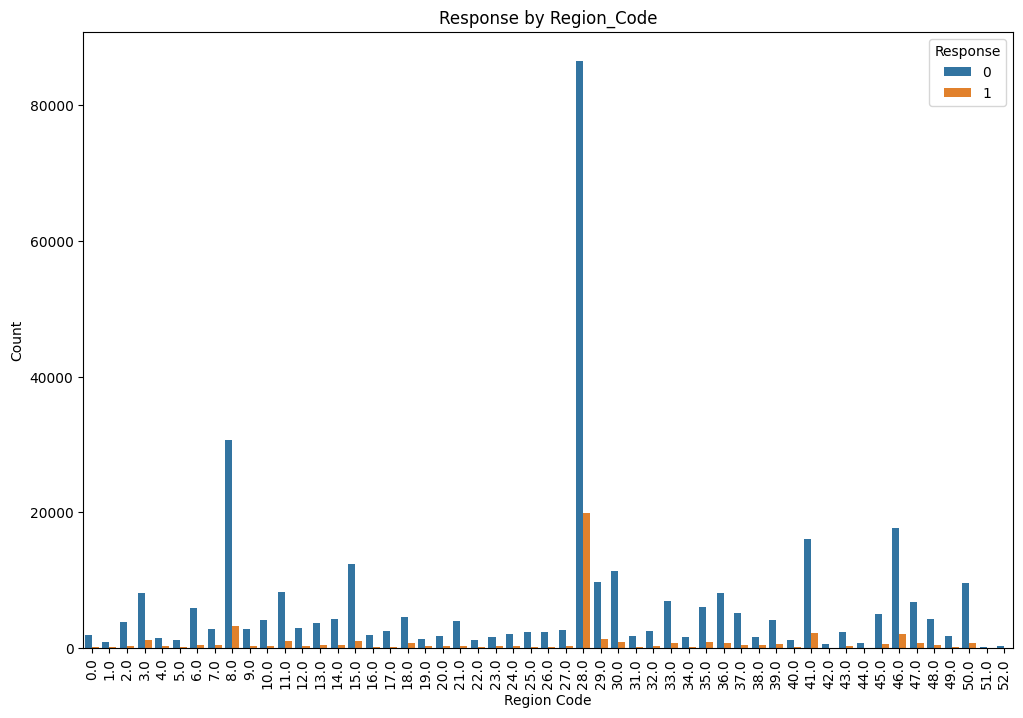

In [25]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Region_Code', hue='Response')
plt.title('Response by Region_Code')
plt.xlabel('Region Code')
plt.ylabel('Count')
plt.legend(title='Response', loc='upper right')
plt.xticks(rotation=90)
plt.show()

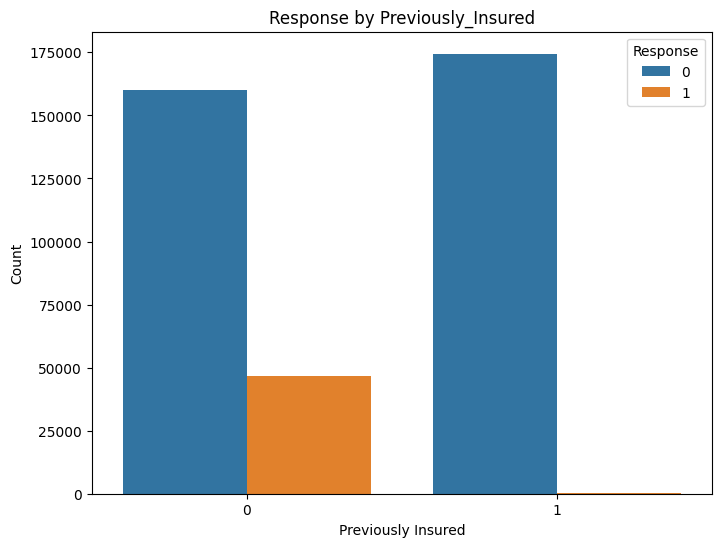

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Previously_Insured', hue='Response')
plt.title('Response by Previously_Insured')
plt.xlabel('Previously Insured')
plt.ylabel('Count')
plt.legend(title='Response', loc='upper right')
plt.show()

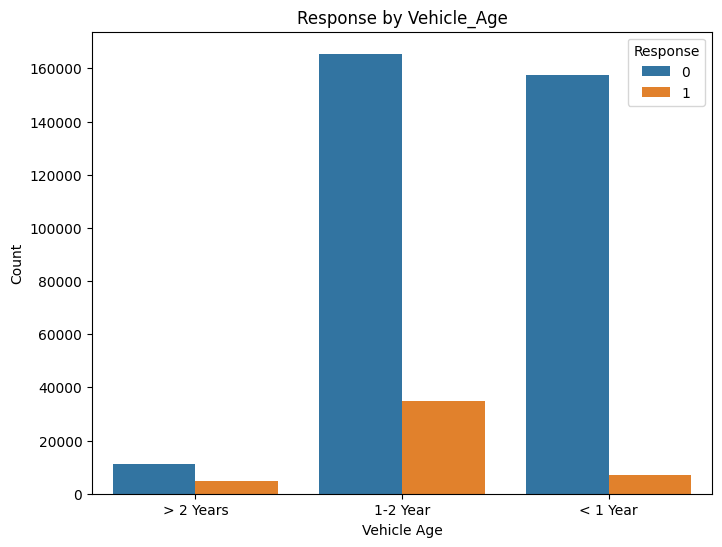

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Vehicle_Age', hue='Response')
plt.title('Response by Vehicle_Age')
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.legend(title='Response', loc='upper right')
plt.show()

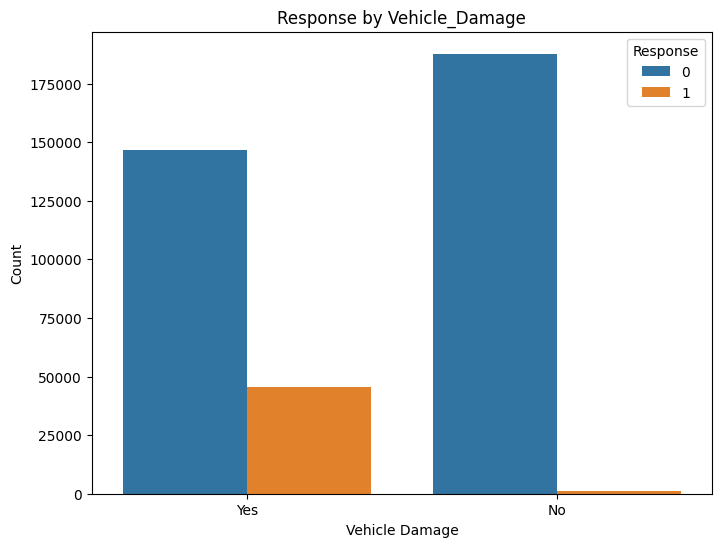

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Vehicle_Damage', hue='Response')
plt.title('Response by Vehicle_Damage')
plt.xlabel('Vehicle Damage')
plt.ylabel('Count')
plt.legend(title='Response', loc='upper right')
plt.show()

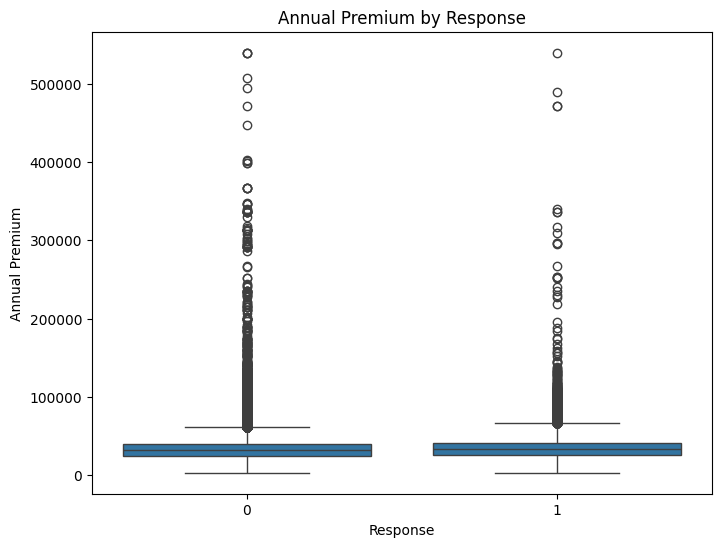

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Response', y='Annual_Premium')
plt.title('Annual Premium by Response')
plt.xlabel('Response')
plt.ylabel('Annual Premium')
plt.show()

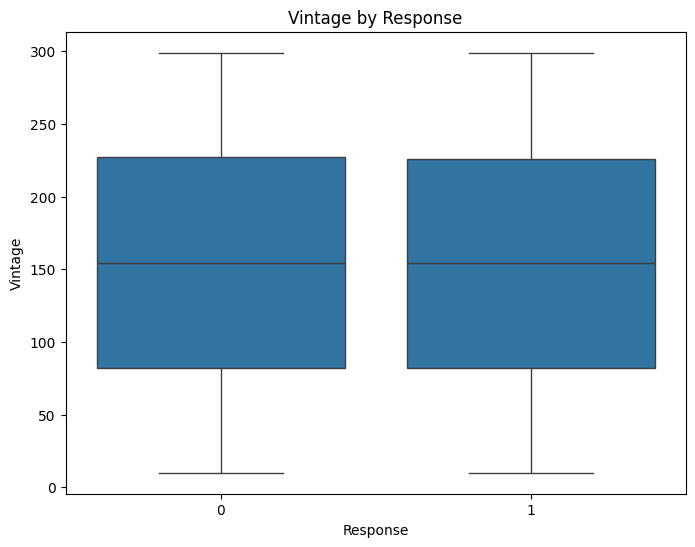

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Response', y='Vintage')
plt.title('Vintage by Response')
plt.xlabel('Response')
plt.ylabel('Vintage')
plt.show()